In [247]:
import re
import pandas as pd;
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [248]:
train_data = pd.read_csv('https://raw.githubusercontent.com/hpnightowl/datasets/main/train_data.csv?token=GHSAT0AAAAAABY45LW6USBY42PFGRBW73B2YZ4J7VA')
val_data = pd.read_csv('https://raw.githubusercontent.com/hpnightowl/datasets/main/val_data.csv?token=GHSAT0AAAAAABY45LW7TWDA7VGMAVJ53GRUYZ4J7XA')
test_data = pd.read_csv('https://raw.githubusercontent.com/hpnightowl/datasets/main/test_data.csv?token=GHSAT0AAAAAABY45LW7PGOVYMRFOFGF2OTQYZ4KARA')

### Analysis of train data

In [249]:
train_data

,input,labels
0,I am reading score of Mahler is Symphony No . .,0
1,I am not interested in cars or electric applia...,1
2,This is my homework for my English class .,0
3,"In comparison , Canada is catches increased an...",0
4,"Fortunately , my older sister is friend is a d...",1
...,...,...
19993,More than a hundred thousand people are suppor...,1
19994,The reason why we chose this subject a few day...,1
19995,When you buy CBS is Criminal Minds DVD in Japa...,1
19996,but it is dizzying for me T T,1


Observations: 
- It has a shape of 19998 * 2

In [250]:
def getinfo(data):
  data.info()

getinfo(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input   19998 non-null  object
 1   labels  19998 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


Observations:
- we can see data type as object for string and int64 for labels

In [251]:
def checknull(data):
  print(data.isnull().sum())

checknull(train_data)

input     0
labels    0
dtype: int64


**Observations**:
- As the result The data set don't have any null values 

###### checking unique values in label column

In [252]:
train_data['labels'].unique()

array([0, 1])

**Observations**:
- So it has only 0 and 1 label

Now, 

Let's check the label data it should not be biased 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


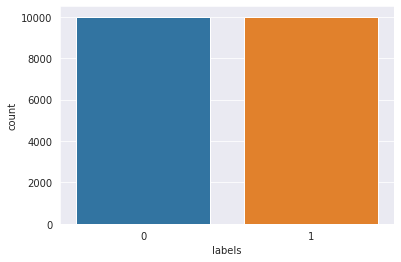

In [253]:
sns.countplot(train_data['labels'])

In [254]:
print("Label 1: ",train_data[train_data['labels']==0]['labels'].count())
print("Label 0: ",train_data[train_data['labels']==1]['labels'].count())
print("Total : ",train_data['labels'].count())

Label 1:  9999
Label 0:  9999
Total :  19998


**Observation**: 
- from the above result it is concluded that the training data is not biased 

In [255]:
train_data['input_len']= train_data['input'].apply(lambda x: len(x.split(' ')))

In [256]:
train_data

,input,labels,input_len
0,I am reading score of Mahler is Symphony No . .,0,11
1,I am not interested in cars or electric applia...,1,10
2,This is my homework for my English class .,0,9
3,"In comparison , Canada is catches increased an...",0,18
4,"Fortunately , my older sister is friend is a d...",1,11
...,...,...,...
19993,More than a hundred thousand people are suppor...,1,11
19994,The reason why we chose this subject a few day...,1,29
19995,When you buy CBS is Criminal Minds DVD in Japa...,1,18
19996,but it is dizzying for me T T,1,8


In [257]:
checknull(train_data)

input        0
labels       0
input_len    0
dtype: int64


In [258]:
getinfo(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   input      19998 non-null  object
 1   labels     19998 non-null  int64 
 2   input_len  19998 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 468.8+ KB


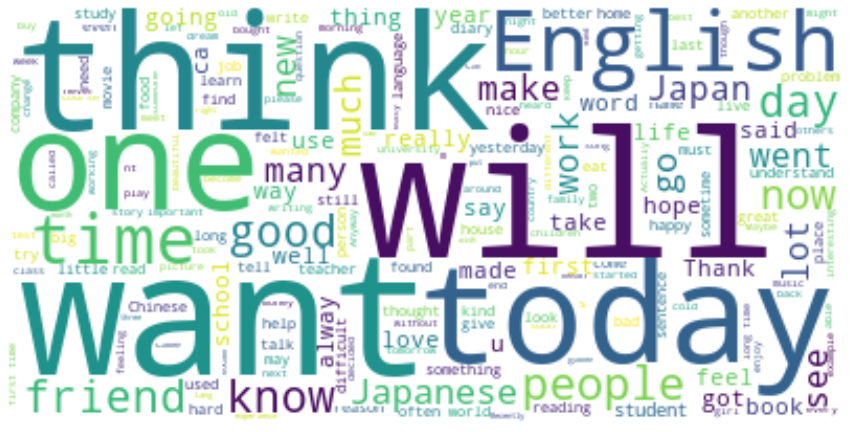

In [259]:
text = " ".join(i for i in train_data.input)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

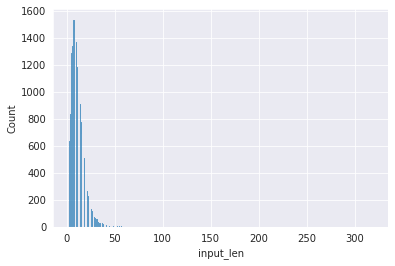

In [260]:
sns.histplot(train_data['input_len'])

In [261]:
train_data.loc[19598].input

'Corporate Governance To check whether the meeting records of the Board of Directors and Special Committee were complete and signed by directors who attended the meetings . To check the contents , deadline and signatures of the formal written authorization of shareholder representatives . To check whether scopes of authority were written in letters of authorization by the directors , the letters were signed by directors and the meeting records took down the trustees who attended the meetings . To read all the formal written meeting records and to check whether the frequency of arranging the Board meetings complies with articles of incorporation . To check the meeting records , resolutions and other related contents of Board of Supervisors and to check whether the frequency of arranging the meeting complies with articles of incorporation . To check the meeting records , resolutions and other related contents of the three Special Committees and whether the frequency of arranging the comm

In [262]:
text_319= train_data.loc[19598].input
text_319= text_319.split(' . ')

In [263]:
text_319

['Corporate Governance To check whether the meeting records of the Board of Directors and Special Committee were complete and signed by directors who attended the meetings',
 'To check the contents , deadline and signatures of the formal written authorization of shareholder representatives',
 'To check whether scopes of authority were written in letters of authorization by the directors , the letters were signed by directors and the meeting records took down the trustees who attended the meetings',
 'To read all the formal written meeting records and to check whether the frequency of arranging the Board meetings complies with articles of incorporation',
 'To check the meeting records , resolutions and other related contents of Board of Supervisors and to check whether the frequency of arranging the meeting complies with articles of incorporation',
 'To check the meeting records , resolutions and other related contents of the three Special Committees and whether the frequency of arrangi

In [264]:
df = pd.DataFrame({'input': text_319,
                  'labels': [1]* len(text_319)})

In [265]:
train_data= train_data.append(df, ignore_index= True)

In [266]:
train_data= train_data.drop(19598, axis= 0).reset_index(drop= True)

In [267]:
train_data['input_len']= train_data['input'].apply(lambda x: len(x.split(' ')))

In [268]:
'''THIS FUNCTION REMOVES THE SPACES BETWEEN THE CONTRACTED WORDS AND REMOVING UNNECESSARY SPACES IN THE SENTENCES
            ca n't ==> can't 
            I 'm ===> I'm ...etc
'''
def remove_spaces(text):
    text = re.sub(r" '(\w)",r"'\1",text)
    text = re.sub(r" \,",",",text)
    text = re.sub(r" \.+",".",text)
    text = re.sub(r" \!+","!",text)
    text = re.sub(r" \?+","?",text)
    text = re.sub(" n't","n't",text)
    text = re.sub("[\(\)\;\_\^\`\/]","",text)
    
    return text


'''THIS FUNCTION DECONTRACTS THE CONTRACTED WORDS'''
#REF : https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text


'''THIS FUNCTION PREPROCESSES THE TEXT '''
def preprocess(text):
    text = re.sub("\n","",text)
    text = remove_spaces(text)   # REMOVING UNWANTED SPACES
    text = re.sub(r"\.+",".",text)
    text = re.sub(r"\!+","!",text)
    text = decontract(text)    # DECONTRACTION
    text = re.sub("[^A-Za-z0-9 ]+","",text)
    text = text.lower()
    return text

In [269]:
'''HERE WE ARE APPLYIN PREPROCESS FUNCTION TO INPUT AND OUTPUT SENTENCES'''

train_data["processed_input"] = train_data.input.apply(preprocess) # APPLYING PREPROCESS FUNCTION TO INPUT 

In [270]:
train_data

,input,labels,input_len,processed_input
0,I am reading score of Mahler is Symphony No . .,0,11,i am reading score of mahler is symphony no
1,I am not interested in cars or electric applia...,1,10,i am not interested in cars or electric applia...
2,This is my homework for my English class .,0,9,this is my homework for my english class
3,"In comparison , Canada is catches increased an...",0,18,in comparison canada is catches increased and ...
4,"Fortunately , my older sister is friend is a d...",1,11,fortunately my older sister is friend is a den...
...,...,...,...,...
20005,To read all the formal written meeting records...,1,25,to read all the formal written meeting records...
20006,To check whether the written notices comply wi...,1,15,to check whether the written notices comply wi...
20007,To check the rules of procedure and reports of...,1,13,to check the rules of procedure and reports of...
20008,To check whether the supervisors are in charge...,1,18,to check whether the supervisors are in charge...


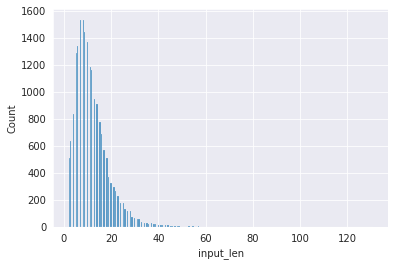

In [271]:
sns.histplot(train_data['input_len'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


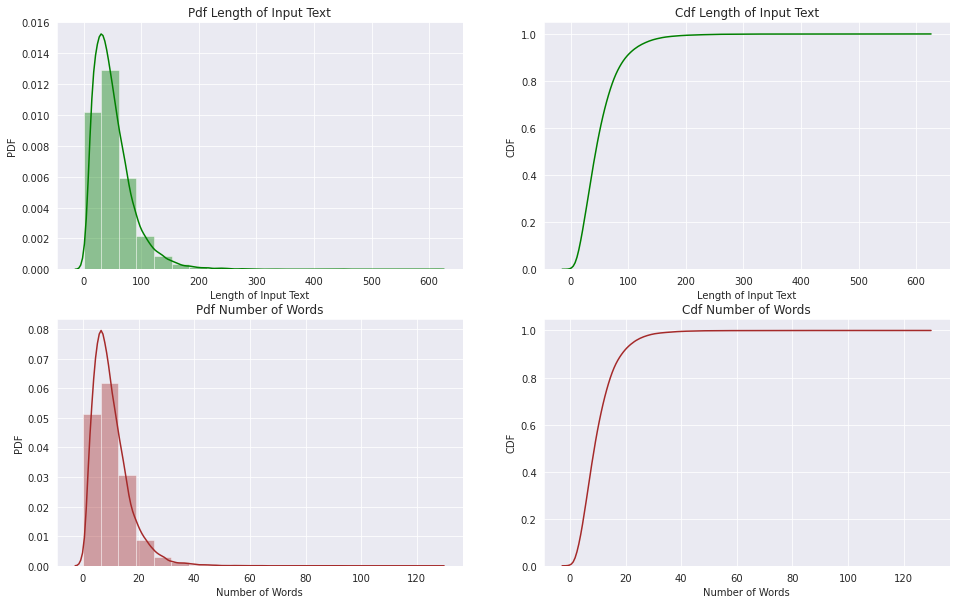

In [272]:
'''THIS CELL PLOTS THE PDF AND CDF OF LENGTH OF CHARACHERTS AND NUMBER OF WORDS FOR INPUT TEXT'''

# THIS PART OF CODE PLOTS THE PDF OF THE LENTH OF INPUT TEXT
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.set_style("darkgrid")
sns.distplot(train_data.processed_input.apply(lambda x:len(str(x))),color="green",bins=20)
plt.title("Pdf Length of Input Text")
plt.xlabel("Length of Input Text")
plt.ylabel("PDF")
# THIS PART OF CODE PLOTS THE CDF OF THE LENGTH OF INPUT TEXT
plt.subplot(2,2,2)
sns.kdeplot(train_data.processed_input.apply(lambda x:len(str(x))),color="green",cumulative=True)
plt.title("Cdf Length of Input Text")
plt.xlabel("Length of Input Text")
plt.ylabel("CDF")
# THIS PART OF CODE PLOTS THE PDF OF NUMBER OF WORDS IN INPUT TEXT
plt.subplot(2,2,3)
sns.distplot(train_data.processed_input.apply(lambda x: len(str(x).split())),color="brown",bins=20)
plt.title("Pdf Number of Words")
plt.xlabel("Number of Words")
plt.ylabel("PDF")
# THIS PART OF CODE PLOTS THE CDF OF NUMBER OF WORDS IN INPUT TEXT
plt.subplot(2,2,4)
sns.kdeplot(train_data.processed_input.apply(lambda x: len(str(x).split())),color="brown",cumulative=True)
plt.xlabel("Number of Words")
plt.title("Cdf Number of Words")
plt.ylabel("CDF")
plt.show()


Obesrvations:

   - The distribution for the length of characters and number of words in the input is slightly positive skewed.
   - Both the distributions  almost follow the same pattern.

In [273]:
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
def pos(text):
    pos = nltk.pos_tag(word_tokenize(text))
    pos = [j for i ,j in pos]
    return pos

tags_input = train_data.processed_input.apply(lambda x: pos(x))
tags_input = [ j for i in tags_input for j in i]
counter_input = Counter(tags_input) 
inp_10 = list(zip(*counter_input.most_common(10)))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


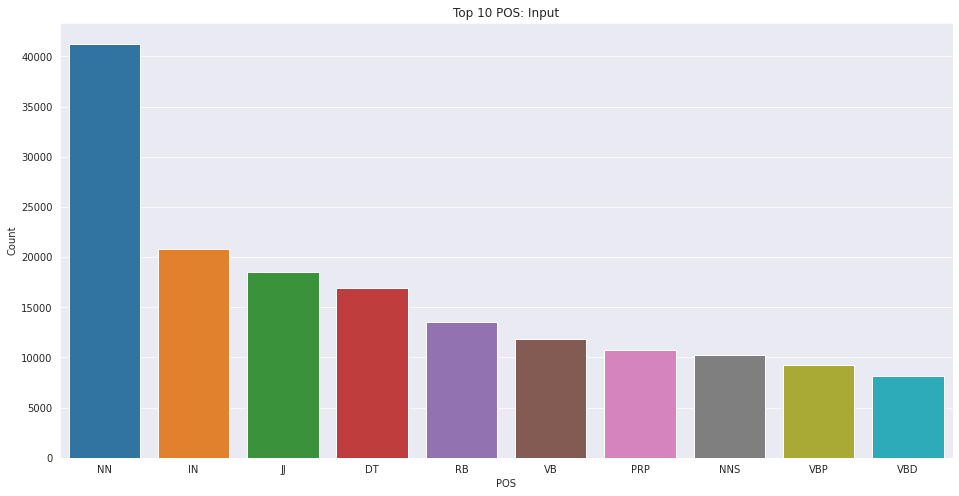

In [274]:
plt.figure(figsize=(16,8))
sns.barplot(x = list(inp_10[0]) , y= list(inp_10[1]))
plt.title("Top 10 POS: Input")
plt.xlabel("POS")
plt.ylabel("Count")
plt.show()

Observation:

Ref: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

- This show part of speech being used for maximum number of times is Noun(NN) followed by Preposition(IN).

- The overall numbers of parts of speech remains the same for input and output sentences but the nubers vary in NNS(Noun, plural) and PRP(personal pronouns)


In [275]:
lemmatizer= WordNetLemmatizer()

def preprocess_data(text):
  text= ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))
  return text

In [276]:
train_data['preprocessed']= train_data['input'].apply(preprocess_data)
val_data['preprocessed']= val_data['input'].apply(preprocess_data)

In [277]:
to_drop= (train_data.loc[train_data['input']== ' '])

In [278]:
to_drop.index

Int64Index([  254,   259,   512,   629,  1033,  1129,  1529,  2149,  2558,
             2879,  2938,  3537,  3714,  3958,  4046,  4068,  4083,  4153,
             4399,  4493,  5128,  5165,  5318,  5622,  5976,  6021,  6313,
             6317,  6470,  6986,  7003,  7216,  7585,  7779,  7879,  8013,
             8136,  8416,  8748,  9058,  9122,  9733,  9872, 10619, 11027,
            11762, 11923, 11971, 12334, 12564, 12611, 12869, 12906, 13053,
            13326, 14287, 14292, 14308, 14773, 14836, 15260, 15407, 15744,
            15827, 15864, 15959, 16912, 17040, 17696, 17786, 18428, 18611,
            19176, 19376, 19882],
           dtype='int64')

In [279]:
train_data= train_data.drop(to_drop.index, axis= 0).reset_index(drop= True)

In [280]:
train_data.to_csv('train_processed.csv', index= False)

## Bert Model

The language representation model for BERT, which represents the two-way encoder representation of Transformer. Unlike other recent language representation models, BERT aims to pre-train deep two-way representations by adjusting the context throughout all layers. Therefore, the pre-trained BERT representation can be fine-tuned through an additional output layer, thus making it suitable for the construction of state-of-the-art models for a wide range of tasks, such as question-answering, text classification, sentence generation etc.
This makes BERT a potent candidate for text-related tasks 
Standard language modeling is unidirectional, which makes the types of architectures that can be used in the pre-training of the model to be limited. And not being able to capture the context of sentences in an optimal way.


In [281]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [282]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [283]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [284]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

import transformers
from transformers import BertConfig, BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup


In [285]:
tokenizer= BertTokenizer.from_pretrained('bert-base-cased')

To feed our text to BERT, it must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.

The tokenization must be performed by the tokenizer included with BERT--the below cell will download this for us. We'll be using the "uncased" version here.

In [286]:
# Getting inputs ids, segments ids and attention masks from the ids
class GEDdataset:
  def __init__(self, raw_inputs, labels, tokenizer, max_length):
    self.raw_inputs= raw_inputs
    self.labels= labels
    self.tokenizer= tokenizer
    self.max_length= max_length

  def __len__(self):
    return len(self.raw_inputs)

  def __getitem__(self, idx):
    text= self.raw_inputs[idx]
    label= self.labels[idx]

    encoding= self.tokenizer.encode_plus(text,
                                         add_special_tokens= True,
                                         max_length= self.max_length,
                                         return_token_type_ids= False,
                                         padding= 'max_length',
                                         truncation= True,
                                         return_attention_mask= True,
                                         return_tensors= 'pt')
    return {
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
        'label': torch.tensor(label, dtype= torch.long)
    }

In [287]:
# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [288]:
# to accomplish the task for training our model

def train_model(dataloader, model, optimizer):
    size= len(dataloader.dataset)
    n_batches= len(dataloader)
    train_loss= 0
    
    model.train()
    for item in dataloader:
      input_ids, attention_mask, label= item['input_ids'].to(device), item['attention_mask'].to(device), item['label'].to(device)

      loss, logits= model(input_ids= input_ids,
                    attention_mask= attention_mask,
                    output_attentions= False,
                    output_hidden_states= False,
                    labels= label, 
                    return_dict = False)
   
      optimizer.zero_grad()
      loss.backward()
      nn.utils.clip_grad_norm_(model.parameters(), 1.0)
      optimizer.step()
      
      loss= loss.item()
      train_loss += loss
        
    train_loss_avg= train_loss/n_batches
    print(f"avg. train loss: {train_loss_avg}")
    return train_loss_avg

In [289]:
# to accomplish the task of data validation

def val_model(dataloader, model):
    size= len(dataloader.dataset)
    n_batches= len(dataloader)
    test_loss= 0

    model.eval()
    with torch.no_grad():
      for item in dataloader:
        input_ids, attention_mask, label= item['input_ids'].to(device), item['attention_mask'].to(device), item['label'].to(device)

        loss, logits= model(input_ids= input_ids,
                      attention_mask= attention_mask,
                      output_attentions= False,
                      output_hidden_states= False,
                      labels= label,
                      return_dict = False)
        
        test_loss += loss

    test_loss /= n_batches
    print(f"avg test loss : {test_loss}")
    return test_loss

In [290]:
# to accomplish the task for testing data

def predict_model(dataloader, model):
    model.eval()
    y_pred= np.array([])
    
    with torch.no_grad():
      for item in dataloader:
        input_ids, attention_mask, label= item['input_ids'].to(device), item['attention_mask'].to(device), item['label'].to(device)

        (logits)= model(input_ids= input_ids,
                      attention_mask= attention_mask,
                      output_attentions= False,
                      output_hidden_states= False,
                      return_dict= False
                      )
        
        logits= logits[0].detach().cpu().numpy()
        preds= np.argmax(logits, axis= 1)
        y_pred= np.concatenate((y_pred, preds))
    return y_pred



In [291]:
train_inputs= train_data.input.values
train_labels= train_data.labels.values

val_inputs= val_data.input.values
val_labels= val_data.labels.values

test_inputs= test_data.input.values
test_labels= np.zeros(test_inputs.shape[0])

In [292]:
# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
TRAIN_BATCHSIZE= 32
TEST_BATCHSIZE= 32

In [293]:
train_dataset= GEDdataset(train_inputs, train_labels, tokenizer, max_length= 15)
val_dataset= GEDdataset(val_inputs, val_labels, tokenizer, max_length= 15)
test_dataset= GEDdataset(test_inputs, test_labels, tokenizer, max_length= 15)

In [294]:
train_loader= DataLoader(train_dataset, TRAIN_BATCHSIZE)
val_loader= DataLoader(val_dataset, TEST_BATCHSIZE)
test_loader= DataLoader(test_dataset, TEST_BATCHSIZE)

In [295]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-8, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-3 # args.adam_epsilon  - default is 1e-8.
                )
# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 3, but we'll see later that this may be over-fitting the
# training data.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_loader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [296]:
best_val_loss= float('inf')
train_loss= []
val_loss= []

for i in range(epochs):
  avg_train_loss= train_model(train_loader, model, optimizer)
  avg_val_loss= val_model(val_loader, model)

  train_loss.append(avg_train_loss)
  val_loss.append(avg_val_loss)

  if avg_val_loss< best_val_loss:
    best_val_loss= avg_val_loss
    filename= 'harh_pal_bert_model.pth'
    torch.save(model.state_dict(), filename)

  scheduler.step()

avg. train loss: 0.7170245969850408
avg test loss : 0.7153664827346802
avg. train loss: 0.7155496815808512
avg test loss : 0.7142025828361511
avg. train loss: 0.7149288071675247
avg test loss : 0.713036298751831


# Loading and Evaluation 

In [297]:
model.load_state_dict(torch.load('harh_pal_bert_model.pth', map_location= device))

<All keys matched successfully>

In [298]:
val_preds= predict_model(val_loader, model)
f1_score(val_labels, val_preds)

0.6666666666666666

With an F1 Score of 66.66%

## Testing Data and Submission

In [299]:
test_preds= predict_model(test_loader, model)

In [300]:
print("Prediction Shape : ",test_preds.shape)
print("Test Data Shape :",test_data.shape)

Prediction Shape :  (9972,)
Test Data Shape : (9972, 1)


In [301]:
test_inputs= test_data['input']

In [302]:
sub= pd.DataFrame({'input': test_inputs,
                   'labels': test_preds})

In [303]:
sub.to_csv('harsh_pal_submission.csv', index= False)